<a href="https://colab.research.google.com/github/ArchoCode/colabTest/blob/main/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import re
import emoji
#import nltk
#nltk.download('punkt')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Installing Emoji Package

In [ ]:
!pip install -U -q emoji

In [ ]:
%matplotlib inline

In [ ]:
data_set= pd.read_csv('/content/tweets.csv')

# Pre-Processing

In [ ]:
def clean_text(df, text_field,new_text_field):
    df[new_text_field]=df[text_field]
    # remove numbers
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove url
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"https?://\S+|www\.\S+", "", elem))
    #remove HTML tags
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r"<.*?>", "", elem))
    #remove emojis 
    df[new_text_field] = df[new_text_field].apply(lambda elem: emoji.get_emoji_regexp().sub(r" ", elem))
    #remove re-tweets status 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'^RT @\w*: ', ' ', elem))
    #remove mentions 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'@\w*', ' ', elem))
    #remove special characters 
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'[!@#&*$.?,]', ' ', elem))
    #remove \n
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\n', ' ', elem))
    #remove ''
    df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub("'", '', elem))
    
    return df

#tokenizing
def tokenize(df,text_field,new_text_field):
  df[new_text_field]=df[text_field]
  df[new_text_field]=df[new_text_field].apply(word_tokenize)
  return df
    
clean_data = clean_text(data_set,'Comment','text_clean')
tokenize_data=tokenize(data_set,'text_clean','tokenized_text')
clean_data.head()

,0,Comment,label,text_clean,tokenized_text
0,1,නැති බැරි කම් අග හිග කම් මැද ජීවත් වෙනවට වඩා හ...,1,නැති බැරි කම් අග හිග කම් මැද ජීවත් වෙනවට වඩා හ...,"[නැති, බැරි, කම්, අග, හිග, කම්, මැද, ජීවත්, වෙ..."
1,2,ඔබ සැමට සුභ දවසක් වේවා!,0,ඔබ සැමට සුභ දවසක් වේවා,"[ඔබ, සැමට, සුභ, දවසක්, වේවා]"
2,3,හැමදේම අත හැර ගියා නම් හරි වගේ,1,හැමදේම අත හැර ගියා නම් හරි වගේ,"[හැමදේම, අත, හැර, ගියා, නම්, හරි, වගේ]"
3,4,රෑට දිලිසෙන ලුමිනස් පාට තරු ටිකක් කාමරේ ඇලෙව්ව...,0,රෑට දිලිසෙන ලුමිනස් පාට තරු ටිකක් කාමරේ ඇලෙව්ව...,"[රෑට, දිලිසෙන, ලුමිනස්, පාට, තරු, ටිකක්, කාමරේ..."
4,5,මට මානසික ගැටලුවක් තියෙනවා. කතාකරන්න පුලුවන් ක...,1,මට මානසික ගැටලුවක් තියෙනවා කතාකරන්න පුලුවන් ක...,"[මට, මානසික, ගැටලුවක්, තියෙනවා, කතාකරන්න, පුලු..."


# Train & Test Split

In [ ]:
# extract the labels from the train data
y = data_set.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(data_set.text_clean.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

# Vectorization

Tf-idf vectorizer

In [ ]:
Tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),analyzer='word')
Tfidf_vectorizer.fit(list(x_train) + list(x_test))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

# transform documents to document-term matrix transform comments into a vector/numerical form
x_train_vec = Tfidf_vectorizer.transform(x_train)
x_test_vec = Tfidf_vectorizer.transform(x_test)

Counter Vectorizer

In [ ]:
# vectorize tweets for model building
counter_vectorizer = CountVectorizer(binary=True)

# learn a vocabulary dictionary of all tokens in the raw documents
counter_vectorizer.fit(list(x_train) + list(x_test))

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# transform documents to document-term matrix
x_train_vec = counter_vectorizer.transform(x_train)
x_test_vec = counter_vectorizer.transform(x_test)

# Model Building

linear SVM Classifier

In [ ]:
# linear SVM Classifier
from sklearn import svm
# classify using support vector classifier
model = svm.SVC(kernel = 'linear', probability=True)
# fit the SVC model based on the given training data
probability = model.fit(x_train_vec, y_train).predict_proba(x_test_vec)
# perform classification and prediction on samples in x_test
prediction = model.predict(x_test_vec)

Performance Messure *SVM*

In [ ]:
print("Accuracy score for SVM is: ", accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for SVM is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for SVM is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')

Accuracy score for SVM is:  71.23287671232876 %
Precision score for SVM is:  68.88888888888889 %
Recall score for SVM is:  81.57894736842105 %


multinomial naive bayes classifier

In [ ]:
#multinominal naive bayes classifier
model = MultinomialNB()
probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)

In [ ]:
#model.score(x_test_vec,y_test)
#model.predict_proba(x_test_vec[0:1])

array([[0.43736894, 0.56263106]])

In [ ]:
print("Accuracy score for MNB is: ", accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for MNB is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for MNB is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')

Accuracy score for MNB is:  65.75342465753424 %
Precision score for MNB is:  61.81818181818181 %
Recall score for MNB is:  89.47368421052632 %


KNN

In [ ]:
k=15
model = KNeighborsClassifier(n_neighbors=k).fit(x_train_vec,y_train)
#probability = model.fit(x_train_vec,y_train).predict_proba(x_test_vec)
prediction = model.predict(x_test_vec)

In [ ]:
print("Accuracy score for KNN is: ", accuracy_score(y_test, prediction) * 100, '%')
print("Precision score for KNN is: ", precision_score(y_test, prediction, pos_label=1) * 100, '%')
print("Recall score for KNN is: ", recall_score(y_test, prediction, pos_label=1) * 100, '%')

Accuracy score for KNN is:  69.86301369863014 %
Precision score for KNN is:  63.793103448275865 %
Recall score for KNN is:  97.36842105263158 %


Maximum accuracy:- 0.7534246575342466 at K = 15


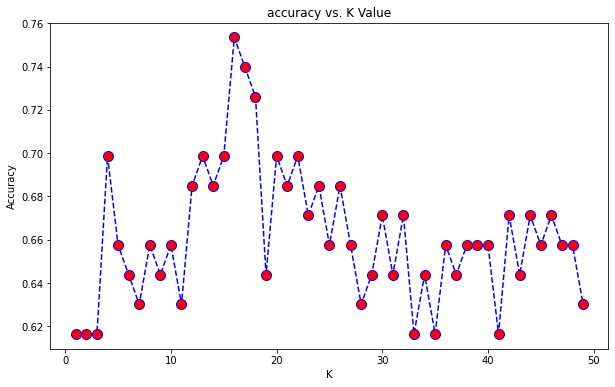

In [ ]:
accuracy = []
# Will take some time
#from sklearn import metrics
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train_vec,y_train)
    prediction = model.predict(x_test_vec)
    accuracy.append(sm.accuracy_score(y_test, prediction))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(accuracy),"at K =",acc.index(max(accuracy)))